## Homework Assignment 3
### Name: Prasad Akmar
### LE10772

In [9]:
import pandas as pd
import os
import numpy as np
import time

## Loading the data:
#### First of all, Loading the given mnist data and labels into local data structures.
I am using arrays to store the data and the labels

In [10]:
mnist_data = np.loadtxt(fname = "https://www.csee.umbc.edu/courses/graduate/691/fall18/data-science/mnist_data.txt", dtype = np.int)

In [11]:
mnist_labels = np.loadtxt(fname = "https://www.csee.umbc.edu/courses/graduate/691/fall18/data-science/mnist_labels.txt",dtype = np.int)

In [12]:
mnist_data.shape

(10000, 784)

In [13]:
mnist_labels.shape

(10000,)

## Converting labels:
#### The problem given is a binary problem. We just have to find out if the given number is 8 or not.
So converting the label data into 0s and 1s. i.e. if given number is 8, the label is 1 otherwise 0. This converted data now can be used in the binary classification problem

In [14]:
for n, i in enumerate(mnist_labels):
    if i == 8:
        mnist_labels[n] = 1
    else:
        mnist_labels[n] = 0

Now that the input data is in place, I will devise an algorithm to make the prediction. I am using batch gradient ascent for logistic regression method to predict the values.

In [15]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def logistic_reg(mnist_data,mnist_labels,num_steps,learning_rate):
    start = time.time()
    weights = np.zeros(mnist_data.shape[1])
    for step in range(num_steps):
        gradient = np.zeros(mnist_data.shape[1])
        for i in (1,10000):
            scores = np.dot(mnist_data,weights)
            predictions = sigmoid(scores)
            error = mnist_labels - predictions
            for j in (1,784):
                gradient += np.dot(mnist_data.T, error)
        weights += learning_rate * gradient
    end = time.time()
    print('Time taken : {0}'. format((end-start)))
    return weights

In [16]:
weights = logistic_reg(mnist_data,mnist_labels,600,1e-3)

Time taken : 120.48108220100403


In [17]:
final_scores = np.dot(mnist_data, weights)
predictions = np.round(sigmoid(final_scores))
print ('Accuracy : {0} %'.format((predictions == mnist_labels).sum().astype(float) / len(predictions)*100))

Accuracy : 92.01 %


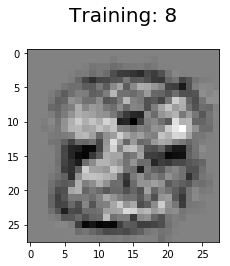

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(weights, [8])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(weights,(28,28)),cmap = plt.cm.gist_gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# We will now introduce the lambda term in the above implementation:

In [20]:
def logistic_regression(mnist_data,mnist_labels,num_steps,learning_rate,lmbda):
    start = time.time()
    weights = np.zeros(mnist_data.shape[1])
    for step in range(num_steps):
        gradient = np.zeros(mnist_data.shape[1])
        for i in (1,10000):
            scores = np.dot(mnist_data,weights)
            predictions = sigmoid(scores)
            error = mnist_labels - predictions
            for j in (1,784):
                gradient += np.dot(mnist_data.T, error)
        weights += learning_rate * gradient
        weights -= lmbda * np.sum(weights**2)
    end = time.time()
    print('Time taken : {0}'. format((end-start)))
    return weights

We will run the algorithm for multiple lambda iterations, and observe the value of lambdas

In [112]:
lam = 0
lambda_list = []
acc_list = []
W = []
while lam<=1:
    
    weights = logistic_regression(mnist_data,mnist_labels,600,1e-3,lam)
    W = weights
    final_scores = np.dot(mnist_data, weights)
    predictions = np.round(sigmoid(final_scores))
    acc = (predictions == mnist_labels).sum().astype(float) / len(predictions)
    lambda_list.append(lam)
    acc_list.append(acc)
    lam += 0.1

Time taken : 116.30217981338501
Time taken : 118.86958837509155
Time taken : 119.99864959716797
Time taken : 119.5431535243988
Time taken : 119.69305157661438
Time taken : 120.09619355201721
Time taken : 118.97213387489319
Time taken : 119.07218790054321
Time taken : 120.45832538604736
Time taken : 119.78451180458069
Time taken : 120.63154768943787


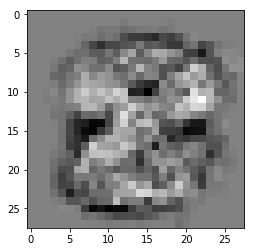

In [114]:
plt.imshow(np.reshape(W,(28,28)),cmap = plt.cm.gist_gray)

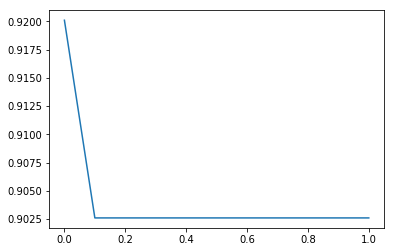

In [116]:
plt.plot(lambda_list, acc_list)
plt.show()

# From the above plot of accuracy vs. lambda, I could conclude that as the value of lambda increases, the accuracy decreses